
# Neighborhood Components Analysis


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tick as tk
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [2]:
clin_file = 'clinical_final_extra.csv'
clin_data = pd.read_csv(clin_file)
clin_data.set_index('bcr_patient_barcode',inplace=True)
clin_data.sort_values(by=["bcr_patient_barcode"]);
# X = X.transpose()

In [3]:
mirna_file = 'mirna_final.csv'
mirna_data = pd.read_csv(mirna_file)
mirna_data.set_index('HYBRIDIZATION R',inplace=True)
mirna_data.sort_values(by=["HYBRIDIZATION R"]);

In [4]:
ll = list(mirna_data.index)
for item in ll:
    tc = item[-3:]
    if tc=="-02":
        mirna_data = mirna_data.drop(str(item))

In [5]:
mirna_data.shape

(512, 548)

In [6]:
lll = list(mirna_data.index)
ll_new = []
for item in lll:
    item = item[0:12]
    ll_new.append(item)
mirna_data.index = ll_new

In [7]:
rem_row = list(set(mirna_data.index)^set(clin_data.index))
rem_row

['TCGA-DB-A75M',
 'TCGA-R8-A6YH',
 'TCGA-HT-A74J',
 'TCGA-DU-7011',
 'TCGA-CS-5390',
 'TCGA-DU-7019',
 'TCGA-QH-A6CW']

In [8]:
for x in rem_row:
    if (x in clin_data.index):
        clin_data = clin_data.drop(x)
    if (x in mirna_data.index):
        mirna_data = mirna_data.drop(x)

print(clin_data.shape)
print(mirna_data.shape)

(509, 32)
(509, 548)


In [9]:
# clin_data.to_csv("processed_clinical_mirna.csv")
# mirna_data.to_csv("processed_mirna.csv")

In [27]:
# X = mirna_data.loc[:,["hsa-let-7e","hsa-let-7f-2","hsa-mir-10b","hsa-mir-1275","hsa-mir-1304","hsa-mir-143","hsa-mir-155","hsa-mir-301b","hsa-mir-3074","hsa-mir-3136","hsa-mir-3158-2","hsa-mir-320a","hsa-mir-3622b","hsa-mir-3678","hsa-mir-3690","hsa-mir-3923"]]
X=mirna_data

In [28]:
X.shape

(509, 548)

In [29]:
y = clin_data[["OS","OS.time"]]
random_state=0
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit(X).fit_transform(X))

In [40]:
data_frame = X
data_frame["Survival"] = y["OS.time"].values
data_frame["Censor"] = y["OS"].values
data_frame=shuffle(data_frame)

In [43]:
from tick.survival import CoxRegression
cph = CoxRegression(penalty="l2")

ModuleNotFoundError: No module named 'dill'

In [ ]:
# accuracies_test_list = pd.DataFrame(index=pd.Series(range(2,X_train.shape[0])), columns = pd.Series(range(1,X_train.shape[1])))
# accuracies_train_list = pd.DataFrame(index=pd.Series(range(2,X_train.shape[0])), columns = pd.Series(range(1,X_train.shape[1])))
# for i in tqdm(range(2,X_train.shape[0])):
#     for j in range(1,X_train.shape[1]):
#         n_neighbors = i
#         random_state = 0
#         nca = make_pipeline(StandardScaler(),NeighborhoodComponentsAnalysis(n_components=j,random_state=random_state))
#         # Fit the model
#         nca.fit(X_train, y_train)
#         # Fit a nearest neighbor classifier on the embedded training set
#         knn = KNeighborsClassifier(n_neighbors=n_neighbors)
#         knn.fit(nca.transform(X_train), y_train)
#         # Compute the nearest neighbor accuracy on the embedded test set
#         acc_knn_test = knn.score(nca.transform(X_test), y_test)
#         acc_knn_train = knn.score(nca.transform(X_train), y_train)
#         accuracies_test_list.iloc[i-2,j-1] = acc_knn_test
#         accuracies_train_list.iloc[i-2,j-1] = acc_knn_train

In [14]:
X = data_frame.drop("y", axis=1)
y = data_frame.iloc[:,data_frame.shape[1]-1]
nca = NeighborhoodComponentsAnalysis(n_components=15,random_state=3120)
nca.fit(X, y)
# Fit a nearest neighbor classifier on the embedded training set
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(nca.transform(X), y)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(nca.transform(X), y)

In [31]:
m=nca.components_

In [33]:
pd.DataFrame(m)

,0,1,2,3,4,5,6,7,8,9,...,538,539,540,541,542,543,544,545,546,547
0,0.021916,0.020600,0.021085,0.025111,0.055169,0.053574,0.037749,0.037554,0.025169,0.101590,...,-0.037983,-0.031431,0.098355,0.034835,0.004170,0.057143,0.011024,0.097538,0.062407,0.055273
1,0.002225,0.001144,0.002150,0.070228,0.086325,0.006538,0.013049,0.027807,0.026033,0.007647,...,0.066966,0.078385,-0.011240,0.097228,0.022494,-0.075546,0.011973,0.041172,0.061035,0.053267
2,-0.015247,-0.015037,-0.015160,0.012787,0.033525,-0.016997,-0.026139,0.062794,-0.040283,-0.042645,...,0.016987,-0.003568,-0.031446,-0.023250,0.013904,-0.020681,-0.069812,0.013304,0.016848,0.012406
3,-0.120602,-0.120648,-0.120944,-0.124699,-0.110111,0.084422,-0.108136,0.001885,-0.113488,0.001378,...,-0.102470,-0.046117,0.018709,-0.053475,-0.015528,0.023472,0.163949,-0.044554,-0.092480,-0.076519
4,-0.128948,-0.128665,-0.129148,-0.076420,-0.091973,-0.043231,-0.118065,-0.046768,-0.081184,-0.112035,...,-0.081201,0.038488,-0.041292,0.110670,-0.009071,-0.000458,-0.037294,-0.026874,-0.142306,-0.092496
5,0.058445,0.058373,0.056726,0.034450,-0.021747,-0.002523,-0.034818,-0.002497,0.027601,-0.031904,...,0.019380,0.022632,0.016616,0.032474,-0.064707,0.087955,0.013375,0.002162,0.014491,-0.031473
6,-0.071863,-0.071748,-0.069468,-0.043123,0.012393,0.014029,-0.030876,0.016109,-0.016195,-0.034929,...,0.027185,0.004897,0.001559,-0.003311,0.004030,0.015260,-0.013955,0.008942,-0.030837,-0.003882
7,-0.057955,-0.056461,-0.056842,0.011267,0.052045,-0.019854,-0.038378,-0.089140,-0.109029,-0.095885,...,0.081768,-0.005705,-0.039697,0.052733,0.002173,-0.049687,-0.071084,-0.083300,0.034114,0.066630
8,-0.015213,-0.014182,-0.012894,-0.031120,-0.027413,-0.034636,-0.044782,-0.000047,0.000936,0.080301,...,-0.073772,-0.003201,0.006754,-0.020024,-0.019870,-0.002181,-0.026367,-0.006201,-0.002007,-0.074407
9,-0.058981,-0.058635,-0.058515,-0.089173,0.046763,0.026924,-0.010855,0.034209,0.003539,0.033091,...,-0.028944,-0.061533,-0.027856,0.021628,0.000318,0.025485,0.012991,0.019252,0.109099,-0.030487


In [18]:
# pd.DataFrame(nca.transform(X)).to_csv("opt_knn_mirna.csv")

In [39]:
accuracies_test_list = []
accuracies_train_list = []
for i in tqdm(range(2,35)):
    random_state = 0
    nca = NeighborhoodComponentsAnalysis(n_components=16,random_state=3120)
    # Fit the model
    score_te=[]
    score_tr=[]
    for j in range(0,5):
        X_test = data_frame.iloc[int(j*509/5):int((j+1)*509/5),:].drop("y", axis=1)
        y_test = data_frame.iloc[int(j*509/5):int((j+1)*509/5),data_frame.shape[1]-1]
        X_train = data_frame.drop(data_frame.index[range(int(j*509/5),int((j+1)*509/5))], axis=0).drop("y", axis=1)
        y_train = data_frame.drop(data_frame.index[range(int(j*509/5),int((j+1)*509/5))], axis=0).loc[:,"y"]
        nca.fit(X_train, y_train)
        # Fit a nearest neighbor classifier on the embedded training set
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(nca.transform(X_train), y_train)
        # Compute the nearest neighbor accuracy on the embedded test set
        acc_knn_test = knn.score(nca.transform(X_test), y_test)
        acc_knn_train = knn.score(nca.transform(X_train), y_train)
        score_te.append(acc_knn_test)
        score_tr.append(acc_knn_train)
    accuracies_test_list.append(np.mean(score_te))
    accuracies_train_list.append(np.mean(score_tr))

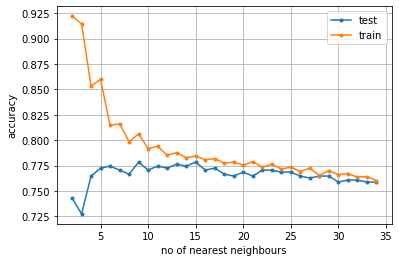

In [31]:
plt.plot(range(2,35),accuracies_test_list, '.-' ,label="test")
plt.plot(range(2,35),accuracies_train_list, '.-' , label="train")
plt.legend()
plt.xlabel("no of nearest neighbours")
plt.ylabel("accuracy")
plt.grid()

In [37]:
opt_nn = np.argmax(accuracies_test_list)+2
print(opt_nn)

15


In [36]:
max_acc = accuracies_test_list[np.argmax(accuracies_test_list)]
print(max_acc)

0.7784313725490196


In [ ]:
#grid search
accuracies_test_list = pd.DataFrame(index=pd.Series(range(2,20)), columns = pd.Series(range(12,18)))
accuracies_train_list = pd.DataFrame(index=pd.Series(range(2,20)), columns = pd.Series(range(12,18)))
for i in tqdm(range(2,20)):
    random_state = 0
    nca = NeighborhoodComponentsAnalysis(n_components=i,random_state=3120)
    # Fit the model
    for k in range(12,18):
        score_te=[]
        score_tr=[]
        for j in range(0,5):
            X_test = data_frame.iloc[int(j*510/5):int((j+1)*510/5),:].drop("y", axis=1)
            y_test = data_frame.iloc[int(j*510/5):int((j+1)*510/5),data_frame.shape[1]-1]
            X_train = data_frame.drop(data_frame.index[range(int(j*510/5),int((j+1)*510/5))], axis=0).drop("y", axis=1)
            y_train = data_frame.drop(data_frame.index[range(int(j*510/5),int((j+1)*510/5))], axis=0).loc[:,"y"]
            nca.fit(X_train, y_train)
            # Fit a nearest neighbor classifier on the embedded training set
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(nca.transform(X_train), y_train)
            # Compute the nearest neighbor accuracy on the embedded test set
            acc_knn_test = knn.score(nca.transform(X_test), y_test)
            acc_knn_train = knn.score(nca.transform(X_train), y_train)
            score_te.append(acc_knn_test)
            score_tr.append(acc_knn_train)
        accuracies_test_list.iloc[i-2,k-12] = np.mean(score_te)
        accuracies_train_list.iloc[i-2,k-12] = np.mean(score_tr)

In [65]:
np.array(accuracies_test_list)

array([[0.7294117647058824, 0.723529411764706, 0.7313725490196079,
        0.7372549019607844, 0.7352941176470589, 0.7372549019607844],
       [0.7254901960784313, 0.7156862745098039, 0.7333333333333334,
        0.7313725490196079, 0.7431372549019608, 0.7372549019607844],
       [0.7392156862745098, 0.7431372549019608, 0.7490196078431373,
        0.7490196078431373, 0.7470588235294118, 0.7450980392156863],
       [0.7568627450980392, 0.7568627450980392, 0.7549019607843137,
        0.7588235294117647, 0.7568627450980392, 0.7568627450980392],
       [0.7509803921568627, 0.7490196078431373, 0.7509803921568627,
        0.7568627450980392, 0.7549019607843137, 0.7549019607843137],
       [0.7607843137254902, 0.7666666666666666, 0.7666666666666666,
        0.7705882352941176, 0.7686274509803922, 0.7686274509803921],
       [0.7607843137254902, 0.7666666666666666, 0.7627450980392156,
        0.7607843137254902, 0.7686274509803921, 0.7686274509803921],
       [0.776470588235294, 0.7725490196078

In [ ]:
plt.imshow(accuracies_train_list)

In [ ]:
X = data_frame.drop("y", axis=1)
y = data_frame.iloc[:,data_frame.shape[1]-1]
nca.fit(X, y)
# Fit a nearest neighbor classifier on the embedded training set
knn = KNeighborsClassifier(n_neighbors=opt_nn)
knn.fit(nca.transform(X), y)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(nca.transform(X), y)

In [ ]:
#comparing with matlab version - knn


In [ ]:
# accuracies_test_list = accuracies_test_list[accuracies_test_list.columns].astype(float)
# n_s=accuracies_test_list.iloc[:120,:]
# seaborn.heatmap(np.array(accuracies_test_list))
plt.plot(accuracies_test_list)

In [ ]:
accuracies_test_list.max()

In [ ]:
plt.plot(accuracies_test_list.max())
plt.xlabel("Number of components")
plt.ylabel("Max test accuracy")

In [ ]:
plt.plot(accuracies_test_list.max(axis=1))
plt.xlabel("Number of neighbours")
plt.ylabel("Max test accuracy")

In [ ]:
plt.plot(accuracies_test_list.iloc[:100,7], label="Test")
plt.plot(accuracies_train_list.iloc[:100,7], label="Train")
plt.legend()

In [ ]:
#find best component
te_max=list(accuracies_test_list.max())
opt_n_comp=te_max.index(max(te_max))+1

In [ ]:
#find best neighbour
te_max_opt=list(accuracies_test_list.iloc[:,opt_n_comp-1])
opt_n_nbr = te_max_opt.index(max(te_max_opt))+2

In [ ]:
n_neighbors = opt_n_nbr
random_state = 0
nca = make_pipeline(StandardScaler(),NeighborhoodComponentsAnalysis(n_components=opt_n_comp,random_state=random_state))
cv_test=[]
cv_train=[]
for i in tqdm(range(0,10)):
    X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.4, stratify=y_new)
    # Fit the model
    nca.fit(X_train, y_train)
    # Fit a nearest neighbor classifier on the embedded training set
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(nca.transform(X_train), y_train)
    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn_test = knn.score(nca.transform(X_test), y_test)
    acc_knn_train = knn.score(nca.transform(X_train), y_train)
    cv_test.append(acc_knn_test)
    cv_train.append(acc_knn_train)
    print(acc_knn_test,acc_knn_train)
print("CV errors: ",np.mean(cv_test),np.mean(cv_train))

In [ ]:
print(accuracies_test_list[np.argmax(accuracies_test_list)])
print(accuracies_train_list[np.argmin(accuracies_train_list)])
plt.plot(accuracies_test_list, label="test")
plt.plot(accuracies_train_list, label="train")
plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
pnt3d = ax.scatter(X_embedded[:,4],X_embedded[:,8], c=y_new)
cbar=plt.colorbar(pnt3d)
cbar.set_label("Values (units)")

In [ ]:
kmeans=[]
g = X.transpose()
for i in tqdm(range(2,20)):
    temp=KMeans(n_clusters=i, random_state=0).fit(g)
    kmeans.append(temp.score(g))

In [ ]:
plt.plot(range(2,20),kmeans,".-")

In [ ]:
gg = KMeans(n_clusters=5, random_state=0).fit(g)
# mirna_data.append(gg.labels_)

In [ ]:
mirna_data=mirna_data.append(pd.Series(gg.labels_, index=mirna_data.columns, name = "Group"))

In [ ]:
groups = set(mirna_data.loc["Group",:])

In [ ]:
plt.hist(mirna_data.loc["Group",:])